<a href="https://colab.research.google.com/github/DonRoboto/Cursos/blob/master/Jorge_Calvillo_ClasificacionSentimientosChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento del Lenguaje Natural
## Clasificación de sentimientos en opiniones
En este ejercicio clasificarás reseñas sobre peliculas asignando una categoría positiva (a favor) o negativa (en contra). 


Bibliografía para el ejercicio:
- https://keras.io/api/datasets/imdb/

- https://www.kaggle.com/drscarlat/imdb-sentiment-analysis-keras-and-tensorflow

In [0]:
# Actualización a tensorflow 2.0
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import backend
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [0]:
# Obtención de los datos.
# Con numeroPalabras establecemos un límite del numero de palabras que tomaremos
# en cuenta. En IMDB las palabras del vocabulario se encuentran ordenadas por frecuencia 
# de aparición. Al asignar num_words en 10,000 indicaremos que 
# consideraremos únicamente las primeras 10,000 palabras que más se repiten.
numeroPalabras = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = numeroPalabras)

In [0]:
# Tamaño del conjunto de entrenamiento.
x_train.shape

(25000,)

In [0]:
# Así se encuentra codificada una opinión en IMDB
x_train[123]

[1,
 307,
 5,
 1301,
 20,
 1026,
 2511,
 87,
 2775,
 52,
 116,
 5,
 31,
 7,
 4,
 91,
 1220,
 102,
 13,
 28,
 110,
 11,
 6,
 137,
 13,
 115,
 219,
 141,
 35,
 221,
 956,
 54,
 13,
 16,
 11,
 2714,
 61,
 322,
 423,
 12,
 38,
 76,
 59,
 1803,
 72,
 8,
 2,
 23,
 5,
 967,
 12,
 38,
 85,
 62,
 358,
 99]

In [0]:
# La longitud de las opiniones cambia.

# EJERCICIO 
# Inspecciona diferentes reseñas y corrobora como cambian sus tamaños.
len(x_train[13456])

68

In [0]:
# Visualización de las etiquetas
y_train[456]

0

## Procesamiento de los datos - Vectorización

In [0]:
# Diccionario de palabras.
# Con este diccionario accedemos a los índices de las palabra. 
diccionarioPalabras = imdb.get_word_index()


In [0]:
# Obtención del índice asignado a la palabra "movie".
diccionarioPalabras['movie']

17

In [0]:
# Diccionario para acceder a la palabra a través del índice.
indice2palabra = dict([(indice, palabra) for (palabra, indice) in diccionarioPalabras.items()])

In [0]:
# La palabra "movie" se encuentra en el lugar 17 de las que más se repiten.
indice2palabra[17]

'movie'

In [0]:
# EJERCICIO
# ¿Cúal es la palabra que más se usa en las reseñas?

In [0]:
# Recuerda que a los índices reales de las palabras se les ha sumado 3 
# para evitar confundirlos con los índices 0, 1 y 2 que estan destinados a:
# 0 -> palabras desconocidas
# 1 -> palabra de inicio de todos los vectores de opiniones
# 2 -> palabras fuera de las 10,000 que hemos indicado al inicio del ejercicio
opinionDecodificada = ' '.join(
[indice2palabra.get(i-3, '?') for i in x_train[123]])

In [0]:
opinionDecodificada

'? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too'

In [0]:
# Normalización de los vectores de opiniones
def codifica1hot(opiniones):
  # La dimensión de opinion1hot matriz será de 25000 filas, 10000 columnas
  opinion1hot = np.zeros((opiniones.shape[0], numeroPalabras))
  for opinion in range(opiniones.shape[0]):
    for indice in opiniones[opinion]:
      # Con el 1 indicamos que la palabra asociada a "indice" aparece en "opinion"
      opinion1hot[opinion, indice] = 1
  return opinion1hot

In [0]:
# Normalización de los conjuntos de entrenamiento y test
x_train_1hot = codifica1hot(x_train)
x_test_1hot = codifica1hot(x_test)

In [0]:
# Tamaño del conjunto nuevo de entrenamiento
x_train_1hot.shape

(25000, 10000)

In [0]:
# Tamaño del conjunto nuevo de test
x_test_1hot

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

## Generación del modelo

In [0]:
# Con esta instrucción eliminamos información previa de los modelos.
backend.clear_session()

In [0]:
# Definición del modelo
modelo = Sequential()

modelo.add(Dense(30, use_bias=True, activation='sigmoid', input_shape=(numeroPalabras,)))
modelo.add(Dense(1, use_bias=True, activation='sigmoid'))

modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                300030    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 300,061
Trainable params: 300,061
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Definición del optimizador
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.0)
# Compilación del modelo
modelo.compile(optimizer=Adam, loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# Entrenamiento
M = modelo.fit(x_train_1hot, y_train, validation_data=(x_test_1hot, y_test), epochs=5,
               batch_size = 30, shuffle = True, verbose = True)

Epoch 1/5
834/834 [==============================] - 7s 9ms/step - loss: 0.3513 - accuracy: 0.8676 - val_loss: 0.2814 - val_accuracy: 0.8871
Epoch 2/5
834/834 [==============================] - 7s 8ms/step - loss: 0.2045 - accuracy: 0.9263 - val_loss: 0.2880 - val_accuracy: 0.8846
Epoch 3/5
834/834 [==============================] - 6s 7ms/step - loss: 0.1594 - accuracy: 0.9418 - val_loss: 0.3123 - val_accuracy: 0.8763
Epoch 4/5
834/834 [==============================] - 6s 8ms/step - loss: 0.1304 - accuracy: 0.9549 - val_loss: 0.3435 - val_accuracy: 0.8720
Epoch 5/5
834/834 [==============================] - 6s 7ms/step - loss: 0.1091 - accuracy: 0.9636 - val_loss: 0.3847 - val_accuracy: 0.8683


## Evaluación del modelo

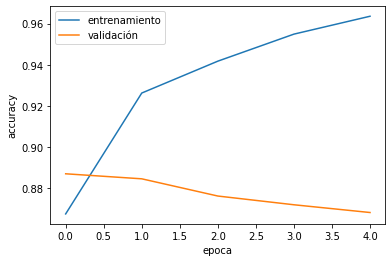

In [0]:
# Evaluar las graficas del accuracy (precisión) y del error es una buena práctica.
# Estas graficas te dicen si el modelo necesita más épocas de entrenamiento, 
# si tienes overfitting o si es el óptimo.
plt.plot(M.history['accuracy'], label='entrenamiento')
plt.plot(M.history['val_accuracy'], label='validación')
plt.legend(loc='best')
plt.xlabel('epoca')
plt.ylabel('accuracy')
plt.show()

In [0]:
# Decodificación de una opinión.
opinionPrueba = ' '.join([indice2palabra.get(i - 3, '?') for i in x_test[23400]])
print(opinionPrueba)

? the reader is a perfect example of what a short film should be a poignant story told simply through well written dialog beautifully painted images a score that ? weaves it's way through the narrative and characters portrayed with ? and grace br br i saw this film at a festival where other interesting films and ideas were screened but none of the other shorts had all the elements of great film making coming together in one film as the reader did the reader ? the attention of every festival goer in the room and for 10 minutes took us into the emotional lives of the characters br br ? rogers has created a beautiful film and i hope to see more from this director be it more shorts or perhaps a feature length film


In [0]:
# Etiqueta de la opinión codificada.
etiqueta = y_test[23400]
print(etiqueta)

1


In [0]:
# Clasificación de la opinión codificada.
# Recuerda que el modelo únicamente acepta vectores de longitud 10,000.
# Como tomamos una opinión del conjunto x_test y no de x_test_1hot, su 
# longitud no es de 10,000.
# Además los elementos de x_test son listas (no arreglos), debido a esto
# el primer paso será convertir la lista en un arreglo de numpy, luego
# convertiremos el arreglo en una matriz de 1 fila x 10,000 columnas 
# y finalmente lo codificaremos con la función codifica1hot.
opinionArreglo = np.array(x_test[23400]).reshape(1,len(x_test[23400]))
opinion1hot = codifica1hot(opinionArreglo)
clasificacion = modelo.predict(opinion1hot)
print(clasificacion)

[[0.99846953]]
